# Random Walk plotting

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select the random walk path
# rw_path = "../rw_ng_test"
rw_path = "../rw_bms_test"

palette = sns.color_palette("husl", n_colors=10)

"""
Step || Expression || Steps without change || Change Distance|| Complexity || Norm
"""

'\nStep || Expression || Steps without change || Change Distance|| Complexity || Norm\n'

1: Complexity vs Steps

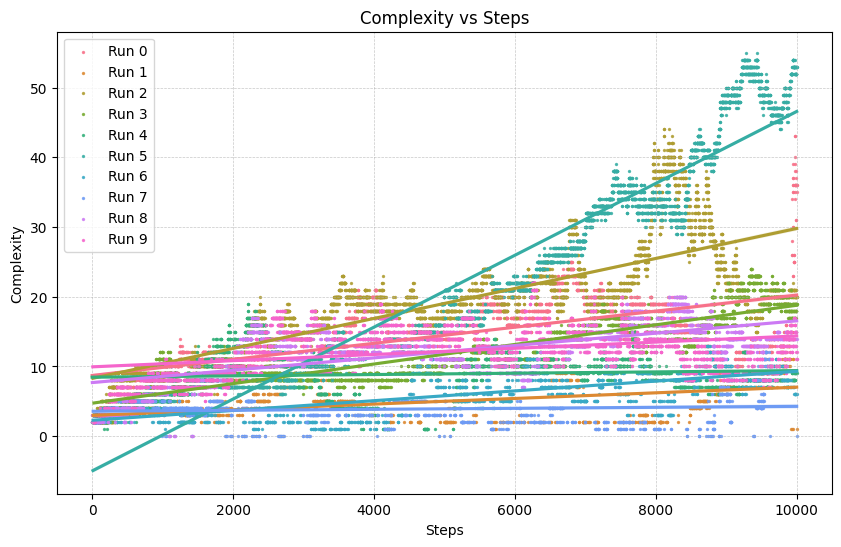

In [10]:
plt.figure(figsize=(10, 6))
i=0
for filename in os.listdir(rw_path):
  if filename.startswith("rw") and filename.endswith(".txt"):

    x_values = []
    y_values = []

    with open(os.path.join(rw_path, filename), "r") as f:
      lines = f.readlines()

      for line in lines[1:]:
        data = line.strip().split(" || ")
        steps = int(data[0])
        complexity = int(data[4])
        x_values.append(steps)
        y_values.append(complexity)

    sns.regplot(x=x_values, y=y_values, scatter=True, color=palette[i], line_kws={"color": palette[i]}, scatter_kws={"s": 2, "alpha": 0.8}, label=f"Run {i}")
    i += 1
plt.title("Complexity vs Steps")
plt.xlabel("Steps")
plt.ylabel("Complexity")
plt.grid(which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()

2: Change distance vs Steps

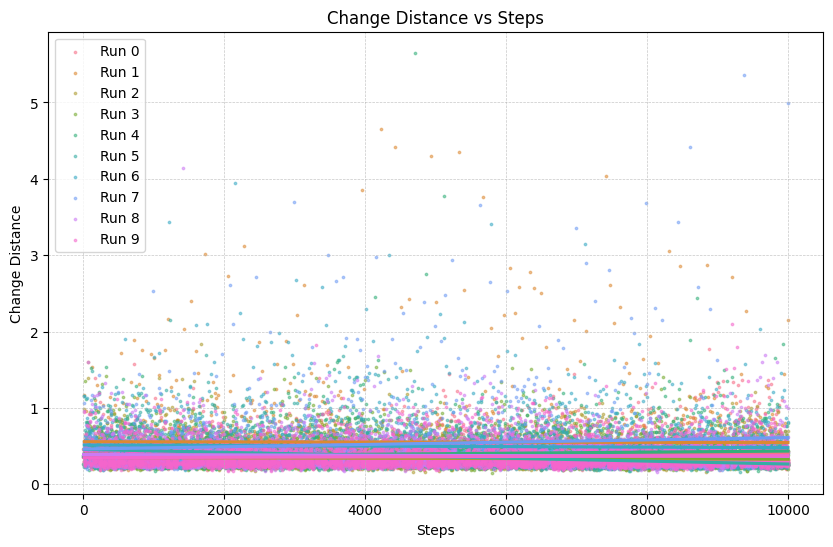

In [12]:
plt.figure(figsize=(10, 6))
i=0
for filename in os.listdir(rw_path):
  if filename.startswith("rw") and filename.endswith(".txt"):
    x_values = []
    y_values = []

    with open(os.path.join(rw_path, filename), "r") as f:
      lines = f.readlines()

      for line in lines[1:]:
        if not line.startswith(("best", "target")):
          data = line.strip().split(" || ")
          steps = int(data[0])
          chng_dists = float(data[3])
          x_values.append(steps)
          y_values.append(chng_dists)

    sns.regplot(x=x_values, y=y_values, scatter=True, color=palette[i], line_kws={"color": palette[i]}, scatter_kws={"s": 3, "alpha": 0.5}, label=f"Run {i}")
    i += 1

plt.title("Change Distance vs Steps")
plt.xlabel("Steps")
plt.ylabel("Change Distance")
plt.grid(which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()

3: Change Distance vs Steps without change

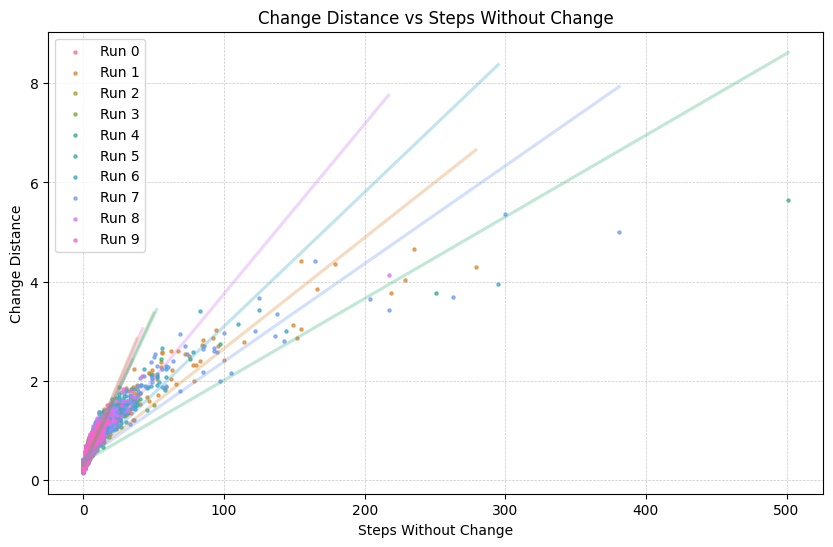

In [4]:
plt.figure(figsize=(10, 6))
i=0
accumulated_data = []
for filename in os.listdir(rw_path):
  if filename.startswith("rw") and filename.endswith(".txt"):
    x_values = []
    y_values = []

    with open(os.path.join(rw_path, filename), "r") as f:
      lines = f.readlines()

      for line in lines[1:]:
        if not line.startswith(("best", "target")):
          data = line.strip().split(" || ")
          steps_no_chng = int(data[2])
          chng_dists = float(data[3])
          x_values.append(steps_no_chng)
          y_values.append(chng_dists)
          accumulated_data.append((steps_no_chng, chng_dists))

    sns.regplot(x=x_values, y=y_values, scatter=True, ci=None, color=palette[i], line_kws={"color": palette[i], "alpha": 0.3}, scatter_kws={"s": 5, "alpha": 0.7}, label=f"Run {i}")
    i += 1

plt.title("Change Distance vs Steps Without Change")
plt.xlabel("Steps Without Change")
plt.ylabel("Change Distance")
plt.grid(which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()

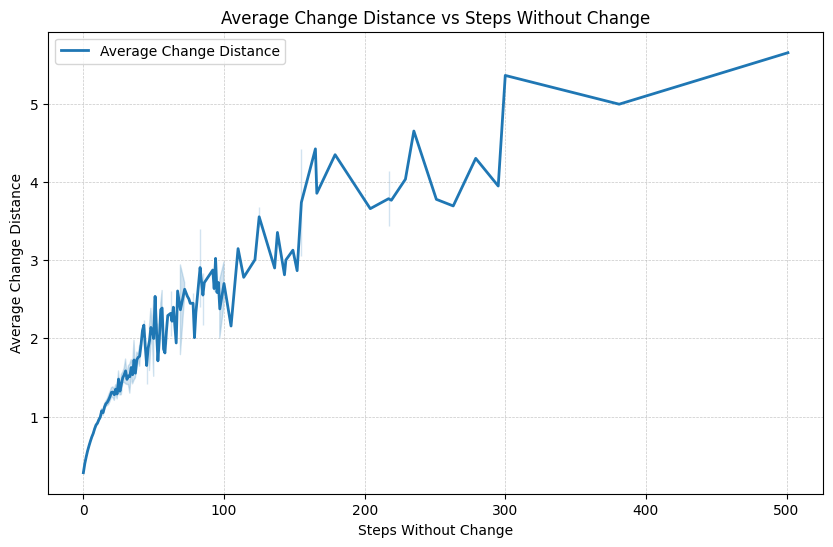

In [5]:
# Create a DataFrame for the total data
total_df = pd.DataFrame(accumulated_data, columns=['Steps Without Change', 'Change Distance'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_df, x='Steps Without Change', y='Change Distance', label='Average Change Distance', linewidth=2)
plt.title("Average Change Distance vs Steps Without Change")
plt.xlabel("Steps Without Change")
plt.ylabel("Average Change Distance")
plt.grid(which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()

4: Norm vs Steps

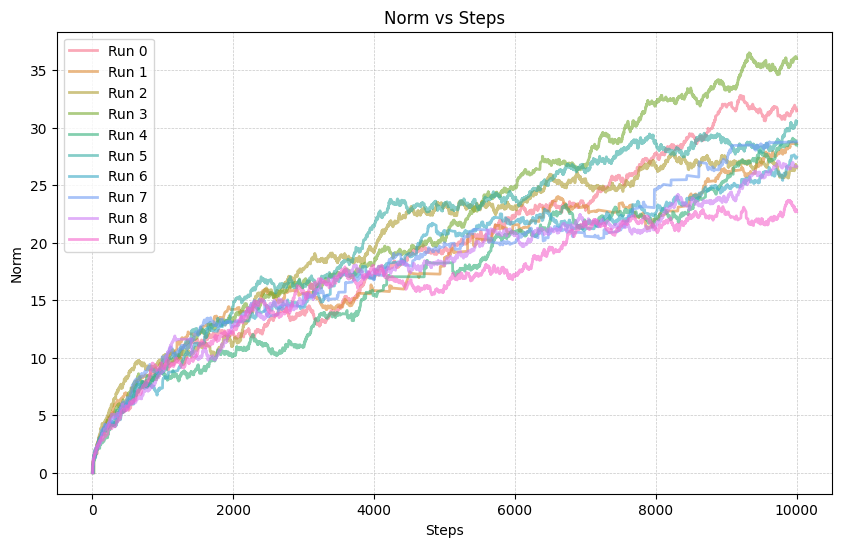

In [6]:
plt.figure(figsize=(10, 6))
i=0
for filename in os.listdir(rw_path):
  if filename.startswith("rw") and filename.endswith(".txt"):
    x_values = []
    y_values = []

    with open(os.path.join(rw_path, filename), "r") as f:
      lines = f.readlines()

      for line in lines[1:]:
        if not line.startswith(("best", "target")):
          data = line.strip().split(" || ")
          steps = int(data[0])
          norms = float(data[5])
          x_values.append(steps)
          y_values.append(norms)

    sns.lineplot(x=x_values, y=y_values, alpha = 0.6, linewidth=2, color=palette[i], label=f"Run {i}")
    i += 1

plt.title("Norm vs Steps")
plt.xlabel("Steps")
plt.ylabel("Norm")
plt.grid(which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()

5: Unique Expressions vs Steps

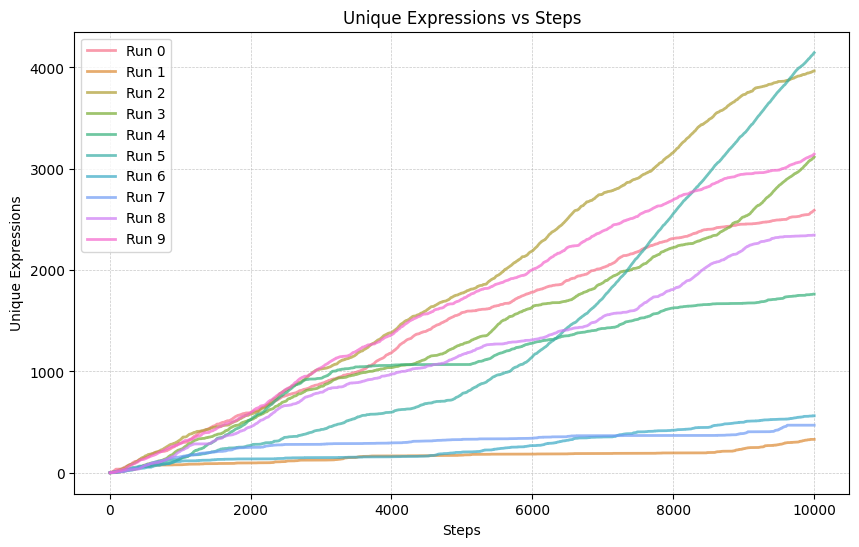

In [7]:
plt.figure(figsize=(10, 6))
i=0
expressions = {}
for filename in os.listdir(rw_path):
  if filename.startswith("rw") and filename.endswith(".txt"):
    x_values = []
    y_values = []
    n_uniq = 0

    with open(os.path.join(rw_path, filename), "r") as f:
      lines = f.readlines()

      for line in lines[1:]:
        if not line.startswith(("best", "target")):
          data = line.strip().split(" || ")
          steps = int(data[0])
          expr = str(data[1])
          expr_visits = int(data[2])
          x_values.append(steps)

          if expr not in expressions:
            expressions[expr] = 0
            n_uniq += 1
          expressions[expr] += 1 + expr_visits

          y_values.append(n_uniq)

    sns.lineplot(x=x_values, y=y_values, color=palette[i], label=f"Run {i}", linewidth=2, alpha=0.7)
    i += 1

plt.title("Unique Expressions vs Steps")
plt.xlabel("Steps")
plt.ylabel("Unique Expressions")
plt.grid(which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()

6: Visits Distribution

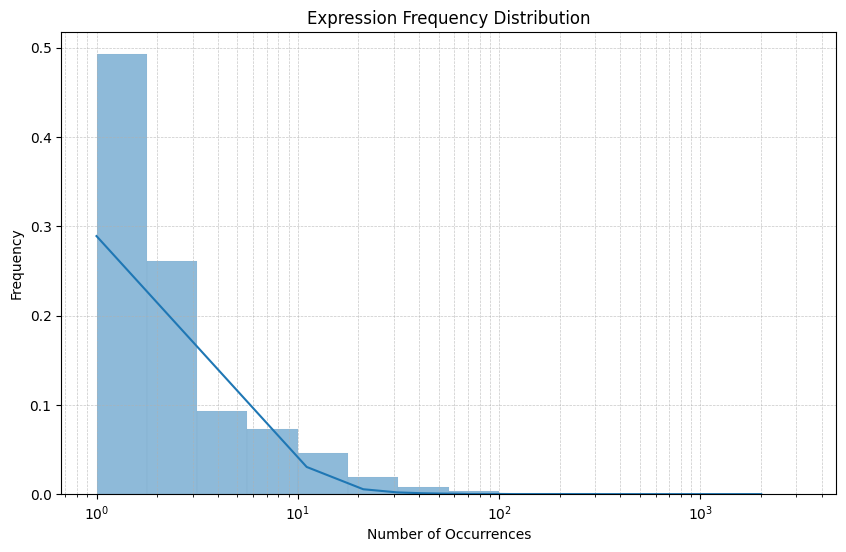

In [8]:
import numpy as np
plt.figure(figsize=(10, 6))
sns.histplot(list(expressions.values()), bins=np.logspace(0, 3.5, 15), kde=True, stat="probability")
plt.title("Expression Frequency Distribution")
plt.xlabel("Number of Occurrences")
plt.ylabel("Frequency")
plt.xscale("log")
plt.grid(which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

In [9]:
print("Expressions || Visits")
for expr, count in sorted(expressions.items(), key=lambda x: x[1], reverse=True):
    print(f"{expr} || {count}")

Expressions || Visits
3 || 2005
C*X || 829
log(4) || 747
sqrt(5-5) || 696
log(cos(C)) || 672
C*exp(C) || 661
log(C^3-C) || 653
sqrt(X-C) || 603
log(X-C) || 595
log(C-C) || 560
log(C-log(C)) || 451
log((C^5)^5) || 449
log(cos(C/C)) || 363
3*X || 362
log(2) || 334
C^5*C || 316
sqrt(5-C) || 306
X/X-X || 301
log(5-5) || 297
sqrt(C-C) || 269
X || 264
log(X) || 261
log(C^3) || 250
cos(C)-C || 225
log(sqrt(X)) || 214
log(C^3-C*C) || 203
cos((C-X)^3) || 203
log(C) || 197
log((C^5)^3) || 187
log(C-5) || 185
log(3) || 183
log(C^2-C*C) || 171
C/(log((((((((X^C-C)*C)*C)*C)*C)*C)*C)*C)*C)^(C^5) || 169
log(log(exp(exp(C*C-C))+C)) || 160
cos(((C+X)^5)^5) || 152
C*sqrt(X) || 150
log(sqrt(X))*cos(cos(X)) || 145
log((sqrt(X)+C)^C) || 144
log(log(exp(exp(C*C))+C/C)) || 137
log(C^2-X/X) || 136
C*sqrt(C) || 135
sqrt(((sin((X^5)^5)+X)+C)-C) || 133
log(cos(X)) || 129
sqrt(sqrt(X+C))-C*(C*(C*C)) || 129
sqrt(sqrt(C))*cos(cos(X)) || 119
log(5-C) || 115
log(log(log(log(log(log(log(log(C)))))))-C) || 113
cos((C^5